<a href="https://colab.research.google.com/github/la26092002/API_Blog_express_Mongodb/blob/main/CNN_BinaryClassification(DDD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install kagglehub if not already installed (uncomment if needed)
# !pip install kagglehub

# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random


import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')


# Print versions
print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)

# Import kagglehub to download the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ismailnasri20/driver-drowsiness-dataset-ddd")

data_path = os.path.join(path, "Driver Drowsiness Dataset (DDD)")
print("Path to dataset files:", path)


TensorFlow version: 2.17.0
Keras version: 3.4.1
Path to dataset files: /root/.cache/kagglehub/datasets/ismailnasri20/driver-drowsiness-dataset-ddd/versions/1


2 classes: ['Drowsy', 'Non Drowsy']


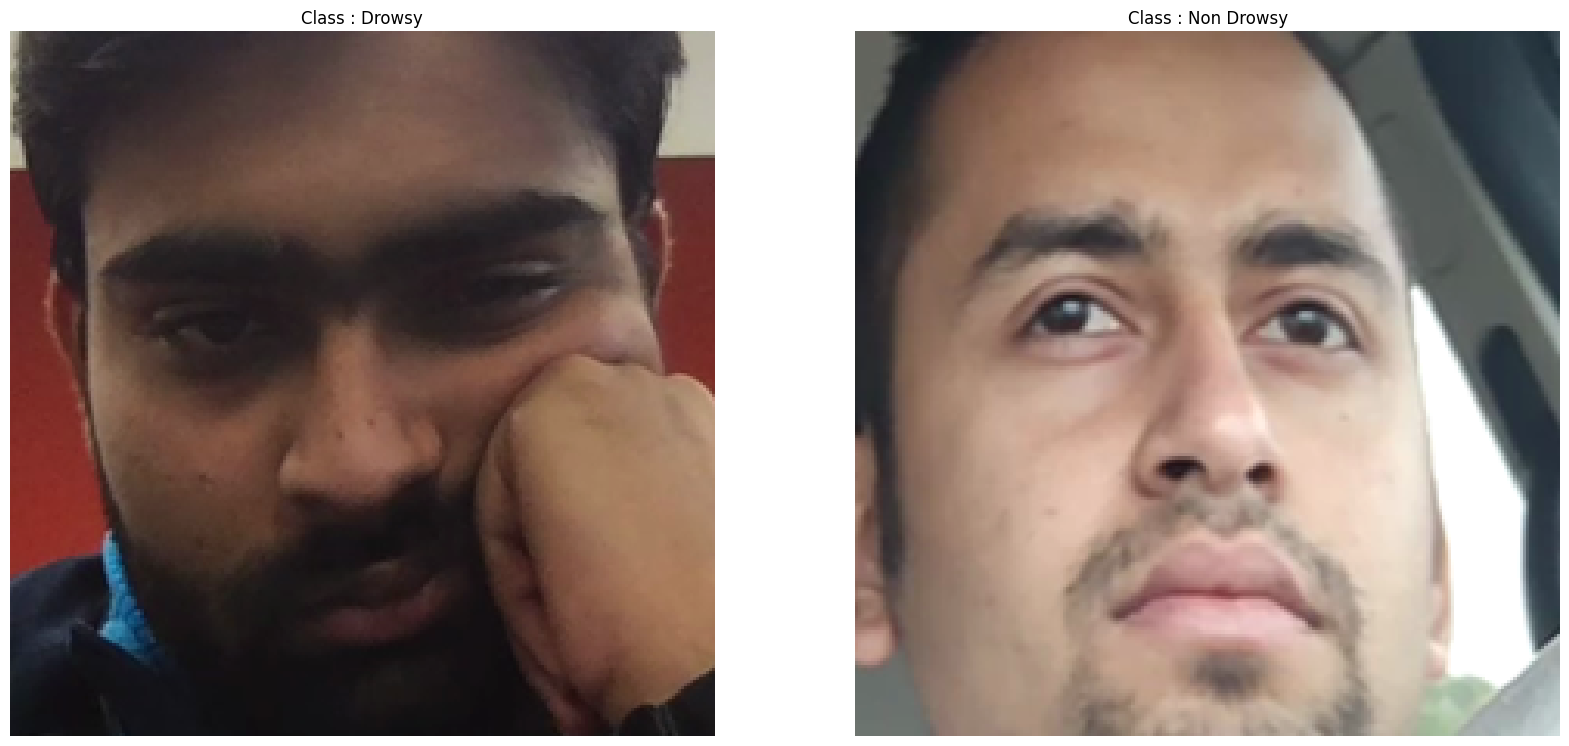

In [ ]:

# Check if data path exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset folder not found at {data_path}")

# Get the class names (only directories)
classes = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
classes.sort()
print('{} classes: {}'.format(len(classes), classes))

# Display one random image of each class
fig = plt.figure(figsize=(20, 35))
i = 0
for sub_path in classes:
    i += 1
    # Choose a random image from the class
    img_file = random.choice(os.listdir(os.path.join(data_path, sub_path)))
    img_path = os.path.join(data_path, sub_path, img_file)

    # Read and display the image
    img = mpimg.imread(img_path)
    ax = fig.add_subplot(1, len(classes), i)
    ax.axis('off')
    ax.imshow(img)
    ax.set_title('Class : ' + sub_path)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (227, 227)
batch_size = 64

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values
                             validation_split=0.2) # hold back 20% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

classnames = list(train_generator.class_indices.keys())
print('[')
print(classnames)
print(']')
print('Data generators ready')

Getting Data...
Preparing training dataset...
Found 33435 images belonging to 2 classes.
Preparing validation dataset...
Found 8358 images belonging to 2 classes.
[
['Drowsy', 'Non Drowsy']
]
Data generators ready


# ***Building the 2D-CNN Sequential model***

In [ ]:
#Initialize the Sequential model
model = Sequential()
#Add the conv2d layer to the model with relu activation function and input sahpe
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(227, 227, 3)))
#add the another maxpoolind layer to the model
model.add(MaxPool2D(2,2))
#add another convluation layer to the model
model.add(Conv2D(64,(3,3),activation='relu'))
#Add the another max pooling layer
model.add(MaxPool2D(2,2))
# Add another Covlution layer with relu activation function
model.add(Conv2D(128,(3,3),activation='relu'))
#Add the another max pooling layer
model.add(MaxPool2D(2,2))
#Add another Covlution layer with relu activation function
model.add(Conv2D(128,(3,3),activation='relu'))
#Add the another max pooling layer
model.add(MaxPool2D(2,2))
#Add the flattern layer to the model
model.add(Flatten())
#Add the dense layer to the model with relu activation function
model.add(Dense(512,activation='relu'))
#Add the dense layer to the model with sigmoid activation function
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 225, 225, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 110, 110, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 53, 53, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

None


# ***Compiling and fitting the model with the Adam optimizer and the accuracy score applied to loss=’binary_crossentropy’***

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

r = model.fit(train_generator,
         epochs = 2,
         validation_data = validation_generator)

Epoch 1/2
523/523 ━━━━━━━━━━━━━━━━━━━━ 4286s 8s/step - accuracy: 0.6305 - loss: 2.3943 - val_accuracy: 0.8034 - val_loss: 3.1946
Epoch 2/2
523/523 ━━━━━━━━━━━━━━━━━━━━ 4304s 8s/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.7162 - val_loss: 3.0698


In [ ]:
predictions = model.predict(validation_generator)
predictions = np.round(predictions)

131/131 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step


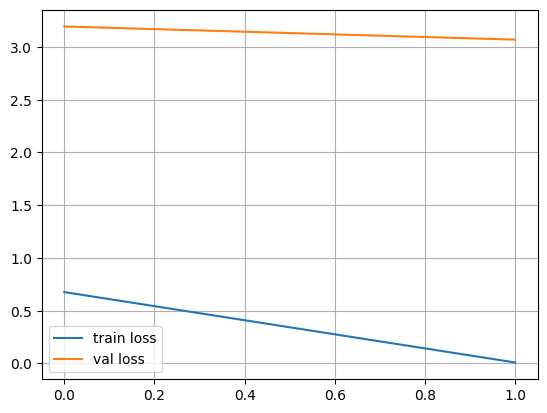

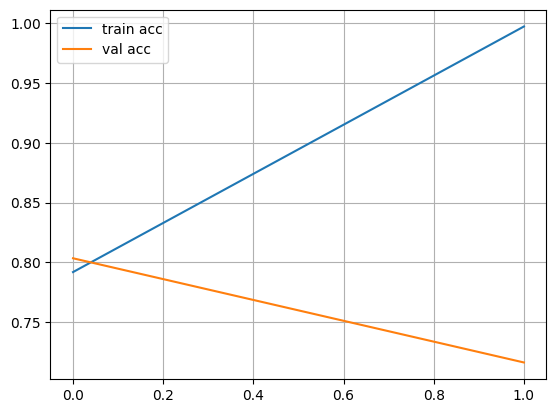

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
#plot the val_loss function
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.grid()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
#plot the val_accuracy score
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#Create a function the model is predict the input images with good accuracy
def predictImage(filename):
    #create a varibale and load_image with target_size
    img1 = image.load_img(filename,target_size=(227,227))
    #Let's visualize it using the matplotlib
    plt.imshow(img1)
    #Create y variable to covert the image into arrys
    Y = image.img_to_array(img1)

    #Expand the shape of an array.

    #Insert a new axis that will appear at the axis position in the expanded array shape.
    X = np.expand_dims(Y,axis=0)
    #Predict the the test dataset
    val = model.predict(X)
    print(val)
    #create condition to for predict the labels
    if val == 1:
        plt.xlabel("Drowsy",fontsize=30)
    elif val == 0:
        plt.xlabel("Non Drowsy",fontsize=30)

In [ ]:
# Save the entire model
model.save('drowsiness_detection_model.keras')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[[1.]]


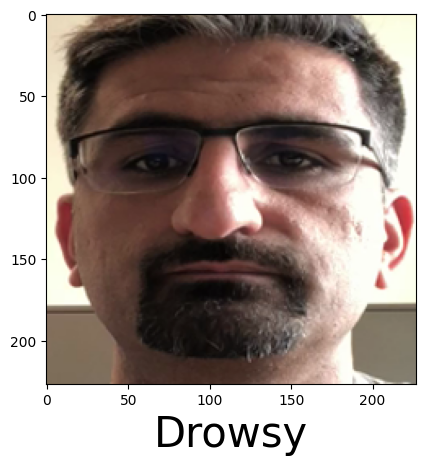

In [ ]:
# Import kagglehub to download the dataset
import kagglehub

path = kagglehub.dataset_download("ismailnasri20/driver-drowsiness-dataset-ddd")

data_path = os.path.join(path, "Driver Drowsiness Dataset (DDD)/Non Drowsy/a0003.png")
predictImage(data_path)